In [18]:
import pandas as pd
table_freq = pd.read_csv('trigram_frequency_table.csv', sep=',')
table_rank = pd.read_csv('trigram_rank_table.csv', sep=',')

In [19]:
table_rank.head(30)

,Trigram,2022,2021,2020,2019,2018
0,graph neural network,1,3,4,9,44
1,deep neural network,2,2,2,2,2
2,deep reinforcement learning,3,5,3,4,4
3,convolutional neural network,4,1,1,1,1
4,multiple input multiple (output),5,6,7,6,5
5,generative adversarial network,6,4,5,3,3
6,natural language processing,7,7,9,15,14
7,3d object detection,8,19,24,31,142
8,bidirectional encoder representation (transfor...,9,8,6,10,513
9,massive multiple input,10,9,14,11,8


In [20]:
import chart_studio
import chart_studio.plotly as py
import plotly.io as pio

## Connect with chartstudio
#username = 'tapetrova' # your username
#api_key = 'fJEC4ECjApnteBsHfStV' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username='tapetrova', api_key='fJEC4ECjApnteBsHfStV')

In [21]:
import plotly.express as px

fig = px.histogram(table_freq[:15].melt(id_vars='Trigram', var_name='year', value_name='frequency'), 
                   x='Trigram', y='frequency', color='year',
                   color_discrete_sequence=px.colors.qualitative.Dark24,
                   nbins=len(table_freq['Trigram'].unique()),
                   animation_frame='year')

fig.update_layout(title='Frequency of Trigrams in arxiv.org CS articles from 2018 to 2022',
                  xaxis_title='Trigram',
                  yaxis_title='Frequency',
                  xaxis_tickangle=-45,
                  xaxis_tickformat = '%',
                  yaxis=dict(range=[0, 0.003]),
                  height=600,
                  width=1000)

#fig.update_traces(texttemplate='%{y:.2%}', textposition='outside')

fig.show()
#py.plot(fig, filename = 'trigram_frequency_v2', auto_open=True)
#fig.write_html('trigram_frequency_v2.html', auto_open=True)

#import plotly.io as pio
pio.write_html(fig, file='trigram_frequency.html', auto_open=True)

In [22]:
import pandas as pd
import plotly.graph_objects as go

# Extract the data for the first 10 trigrams and the years 2018-2022
trigrams = table_freq['Trigram'][:5]
years = ['2019', '2020', '2021', '2022']
data = table_freq.set_index('Trigram').loc[trigrams, years]

# Define the colors for each trigram
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

# Create a go.Figure() object
fig = go.Figure()

# Create a loop to add a trace for each trigram
for i, trigram in enumerate(trigrams):
    color = colors[i]
    fillcolor = f"rgba({str(int(color[1:3], 16))}, {str(int(color[3:5], 16))}, {str(int(color[5:7], 16))}, 0.07)"
    fig.add_trace(go.Scatterpolar(
        r=data.loc[trigram],
        theta=years,
        fill='toself',
        fillcolor=fillcolor,
        line=dict(color=color, width=2),
        name=trigram
    ))

# Set the layout of the figure
fig.update_layout(
    title='Radar Chart of Trigram Frequency in arXiv.org CS Articles from 2019-2022',
    polar=dict(
        radialaxis=dict(
            tickfont=dict(size=10)
        ),
        angularaxis=dict(
            tickfont=dict(size=10)
        )
    )
)

fig.show()
#py.plot(fig, filename = 'radar_chart_frequency_2019_2022', auto_open=True)


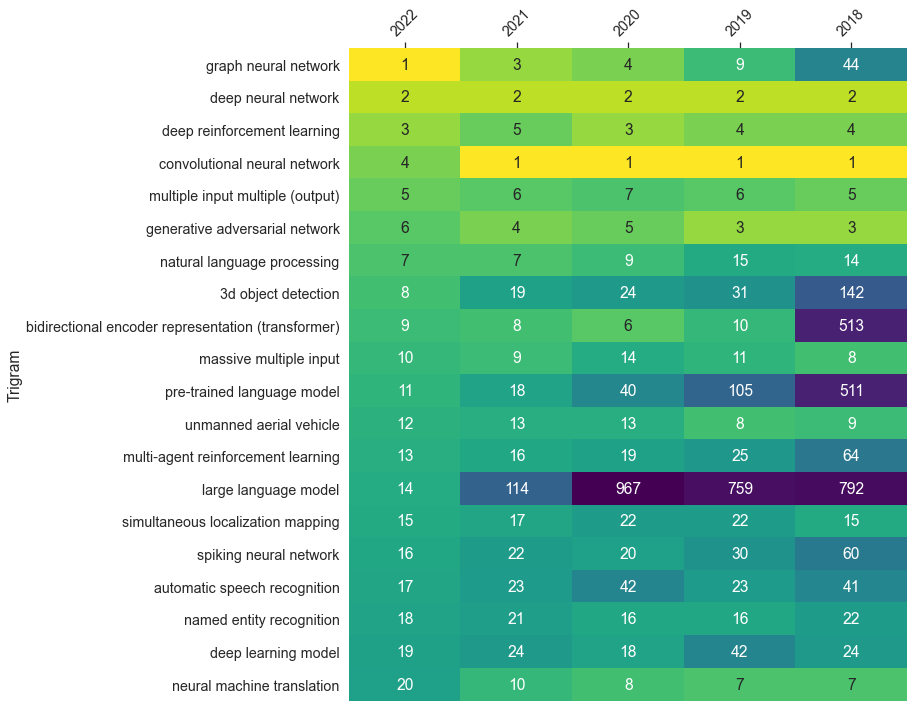

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter the rank table to include only the top 20 trigrams of 2022
table_filtered = table_rank[table_rank['Trigram'].isin(table_rank['Trigram'][:20].tolist())]

# Sort the trigrams in descending order
table_filtered = table_filtered.sort_values(by='2022', ascending=True)

# Prepare the data for the heatmap
heatmap_data = table_filtered.set_index('Trigram')

# Calculate the natural logarithm of the rank for coloring
log_heatmap_data = np.log(heatmap_data)

# Set the font scale
sns.set(font_scale=1.3)

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 12))
ax = sns.heatmap(log_heatmap_data, cmap='viridis_r', annot=heatmap_data, cbar=False, fmt='.0f', yticklabels=True)

# Set x-axis labels on the top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

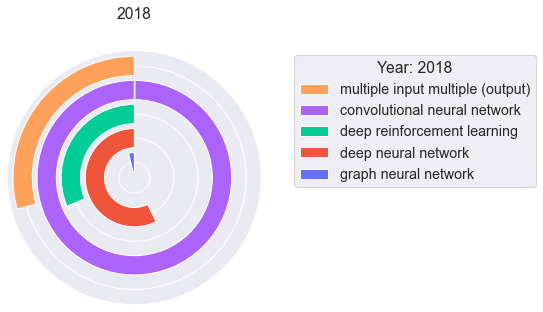

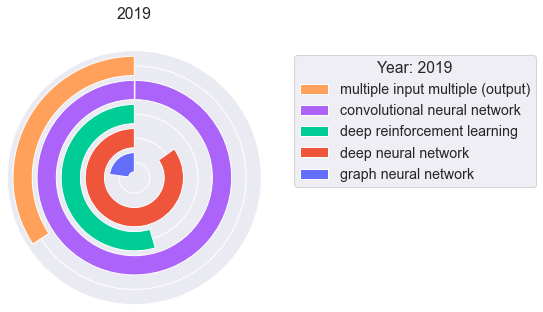

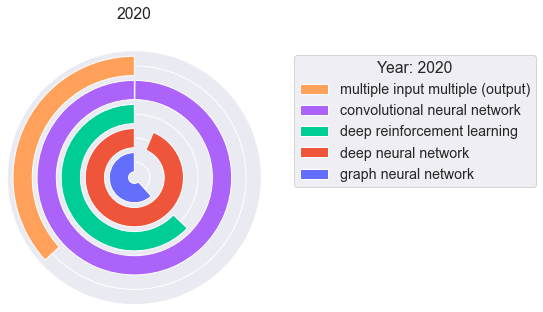

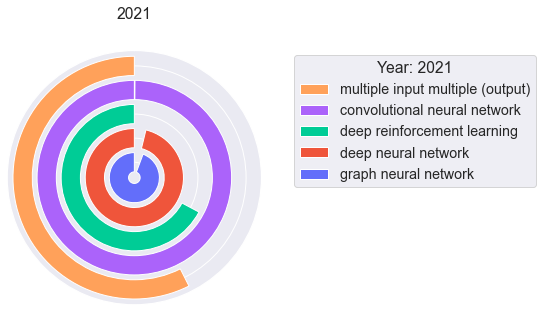

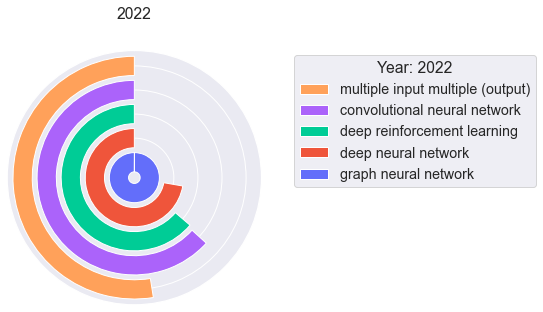

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def create_circular_chart(year):
    trigrams = table_freq['Trigram'][:5]
    data = table_freq.set_index('Trigram').loc[trigrams, year]

    max_val = data.max() * 1.001
    colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
    
    ax = plt.subplot(projection='polar')

    for i, trigram in enumerate(trigrams):
        ax.barh(i, data.loc[trigram] * 2 * np.pi / max_val,
                label=trigram, color=colors[i])

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(1)
    ax.set_rlabel_position(0)
    ax.set_thetagrids([], labels=[])
    ax.set_rgrids(range(len(trigrams)), labels=[''] * len(trigrams))  # Set labels to an empty list

    plt.tight_layout()
    handles, labels = plt.gca().get_legend_handles_labels()
    order = list(range(len(labels)))
    order.reverse()
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
               bbox_to_anchor=(1.1, 1.01), title=f'Year: {year}')
    
    plt.title(f'{year}', y=1.1)
    plt.show()

years = ['2018', '2019', '2020', '2021', '2022']

for year in years:
    create_circular_chart(year)

In [25]:
table_filtered.head()

,Trigram,2022,2021,2020,2019,2018
0,graph neural network,1,3,4,9,44
1,deep neural network,2,2,2,2,2
2,deep reinforcement learning,3,5,3,4,4
3,convolutional neural network,4,1,1,1,1
4,multiple input multiple (output),5,6,7,6,5


In [26]:
table_filtered.head(30)

,Trigram,2022,2021,2020,2019,2018
0,graph neural network,1,3,4,9,44
1,deep neural network,2,2,2,2,2
2,deep reinforcement learning,3,5,3,4,4
3,convolutional neural network,4,1,1,1,1
4,multiple input multiple (output),5,6,7,6,5
5,generative adversarial network,6,4,5,3,3
6,natural language processing,7,7,9,15,14
7,3d object detection,8,19,24,31,142
8,bidirectional encoder representation (transfor...,9,8,6,10,513
9,massive multiple input,10,9,14,11,8


In [27]:
import plotly.express as px
import numpy as np
from scipy.stats import linregress

table_filtered = table_rank.head(100).copy()
table_filtered['Diff'] = table_filtered['2018'] - table_filtered['2022']

table_filtered = table_filtered.dropna(subset=['Diff'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(table_filtered['2022'], table_filtered['2018'])

# Calculate the residuals and the standard deviation of residuals
table_filtered['residuals'] = table_filtered['2018'] - (slope * table_filtered['2022'] + intercept)
residuals_std = np.std(table_filtered['residuals'])

# Define the number of standard deviations for outlier detection
num_std_dev = 2

# Create the scatterplot
fig = px.scatter(
    table_filtered,
    x='2022',
    y='2018',
    hover_name='Trigram'
)

# Add the best-fit line (gray line)
fig.add_shape(
    type='line',
    x0=min(table_filtered['2022']),
    x1=max(table_filtered['2022']),
    y0=slope * min(table_filtered['2022']) + intercept,
    y1=slope * max(table_filtered['2022']) + intercept,
    line=dict(color='gray')
)

# Add lines for outlier boundaries
fig.add_shape(
    type='line',
    x0=min(table_filtered['2022']),
    x1=max(table_filtered['2022']),
    y0=slope * min(table_filtered['2022']) + intercept + num_std_dev * residuals_std,
    y1=slope * max(table_filtered['2022']) + intercept + num_std_dev * residuals_std,
    line=dict(color='red', dash='dot')
)

fig.add_shape(
    type='line',
    x0=min(table_filtered['2022']),
    x1=max(table_filtered['2022']),
    y0=slope * min(table_filtered['2022']) + intercept - num_std_dev * residuals_std,
    y1=slope * max(table_filtered['2022']) + intercept - num_std_dev * residuals_std,
    line=dict(color='red', dash='dot')
)

fig.update_traces(
    marker=dict(
        size=12,
        color=table_filtered['Diff'],
        colorscale='RdBu_r',
        colorbar=dict(title='Rank Difference: 2018 vs. 2022'),
        line=dict(color='black', width=1)  # Add black border around each point
    )
)

fig.update_layout(
    title='Scatterplot of Trigrams Rank in 2022 vs. 2018 with Outlier Boundaries',
    xaxis_title='Rank in 2022',
    yaxis_title='Rank in 2018'
)

fig.update_traces(text=table_filtered.index)
fig.show()
pio.write_html(fig, file='trigram_scatterplot.html', auto_open=True)

In [28]:
import plotly.express as px
import numpy as np
from scipy.stats import linregress

table_filtered = table_rank.copy()
table_filtered['Diff'] = table_filtered['2018'] - table_filtered['2022']
table_filtered['Diff_ln'] = np.log(np.abs(table_filtered['2018'] - table_filtered['2022']))
table_filtered['2018_ln'] = np.log(table_filtered['2018'])
table_filtered['2022_ln'] = np.log(table_filtered['2022'])



table_filtered = table_filtered.dropna(subset=['Diff_ln'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(table_filtered['2022_ln'], table_filtered['2018_ln'])

# Calculate the residuals and the standard deviation of residuals
table_filtered['residuals'] = table_filtered['2018_ln'] - (slope * table_filtered['2022_ln'] + intercept)
residuals_std = np.std(table_filtered['residuals'])

# Define the number of standard deviations for outlier detection
num_std_dev = 2

# Create the scatterplot
fig = px.scatter(
    table_filtered,
    x='2022_ln',
    y='2018_ln',
    hover_name='Trigram'
)

# Add the best-fit line (gray line)
fig.add_shape(
    type='line',
    x0=min(table_filtered['2022_ln']),
    x1=max(table_filtered['2022_ln']),
    y0=slope * min(table_filtered['2022_ln']) + intercept,
    y1=slope * max(table_filtered['2022_ln']) + intercept,
    line=dict(color='gray')
)

# Add lines for outlier boundaries
fig.add_shape(
    type='line',
    x0=min(table_filtered['2022_ln']),
    x1=max(table_filtered['2022_ln']),
    y0=slope * min(table_filtered['2022_ln']) + intercept + num_std_dev * residuals_std,
    y1=slope * max(table_filtered['2022_ln']) + intercept + num_std_dev * residuals_std,
    line=dict(color='red', dash='dot')
)

fig.add_shape(
    type='line',
    x0=min(table_filtered['2022_ln']),
    x1=max(table_filtered['2022_ln']),
    y0=slope * min(table_filtered['2022_ln']) + intercept - num_std_dev * residuals_std,
    y1=slope * max(table_filtered['2022_ln']) + intercept - num_std_dev * residuals_std,
    line=dict(color='red', dash='dot')
)

fig.update_traces(
    marker=dict(
        size=12,
        color=table_filtered['Diff'],
        colorscale='RdBu_r',
        colorbar=dict(title='Rank Difference: 2018 vs. 2022'),
        line=dict(color='black', width=1)  # Add black border around each point
    )
)

fig.update_layout(
    title='Scatterplot of Trigrams Rank in 2022 vs. 2018 with Outlier Boundaries',
    xaxis_title='Rank in 2022 (natural log scale)',
    yaxis_title='Rank in 2018 (natural log scale)'
)

fig.update_traces(text=table_filtered.index)
fig.show()
pio.write_html(fig, file='trigram_scatterplot.html', auto_open=True)

/Users/tapetrova/miniconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



In [29]:
def rename_columns(row, mapping):
    for old_name, new_name in mapping.items():
        row.loc[row['Trigram'] == old_name, 'Trigram'] = new_name
    return row

mapping = {
    'bidirectional encoder representation (transformer)': 'BERT',
    'physics-informed neural network': 'PINN',
    'large language model': 'LLM',
    'offline reinforcement learning': 'online RL',
    'pre-trained language model': 'pre-trained LM',
    'graph neural network': 'GNN'
}

table_filtered = rename_columns(table_filtered, mapping)

In [30]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

def identify_outliers(data, num_std_dev, residuals_std):
    return data[np.abs(data['residuals']) > num_std_dev * residuals_std]

def create_scatterplot(data, x, y, hover_name):
    return px.scatter(data, x=x, y=y, hover_name=hover_name)

def add_outlier_trace(fig, data, x, y, text, textposition, hovertemplate):
    fig.add_trace(
        go.Scatter(
            x=data[x],
            y=data[y],
            mode='markers+text',
            marker=dict(
                size=8,
                color=data['Diff'],
                colorscale='RdBu_r',
                line=dict(color='black', width=1)
            ),
            text=data[text],
            textposition=textposition,
            textfont=dict(size=10),
            hovertemplate=hovertemplate
        )
    )
def add_lines(fig, data, slope, intercept, num_std_dev, residuals_std):
    x_min, x_max = min(data['2022_ln']), max(data['2022_ln'])
    y0, y1 = slope * x_min + intercept, slope * x_max + intercept
    fig.add_shape(type='line', x0=x_min, x1=x_max, y0=y0, y1=y1, line=dict(color='gray'))
    fig.add_shape(type='line', x0=x_min, x1=x_max, y0=y0 + num_std_dev * residuals_std, y1=y1 + num_std_dev * residuals_std, line=dict(color='red', dash='dot'))
    fig.add_shape(type='line', x0=x_min, x1=x_max, y0=y0 - num_std_dev * residuals_std, y1=y1 - num_std_dev * residuals_std, line=dict(color='red', dash='dot'))

def update_layout(fig, title, xaxis_title, yaxis_title):
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title
    )

# Identify the outliers
outliers = identify_outliers(table_filtered, num_std_dev, residuals_std)

# Create the scatterplot for non-outliers
fig = create_scatterplot(table_filtered[np.abs(table_filtered['residuals']) <= num_std_dev * residuals_std],
                         x='2022_ln', y='2018_ln', hover_name='Trigram')

# Add the scatterplot for outliers with trigram labels
add_outlier_trace(fig, outliers, '2022_ln', '2018_ln', 'Trigram', 'bottom right',
                  'Trigram: %{text}<br>Rank 2018: %{y}<br>Rank 2022: %{x}<extra></extra>')

# Add the best-fit line and outlier boundaries
add_lines(fig, table_filtered, slope, intercept, num_std_dev, residuals_std)

# Update layout
update_layout(fig, 'Scatterplot of Trigrams Rank in 2022 vs. 2018 with Outlier Trigram Names',
              'Rank in 2022 (natural log scale)', 'Rank in 2018 (natural log scale)')

fig.show()
pio.write_html(fig, file='trigram_scatterplot_v1.html', auto_open=True)